In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import csv
import seaborn as sns


d:\Languages\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loads in the dataset
df = pd.read_parquet("merged_nominal.parquet")

#Loads in the process names
with open("summary.json", "r") as f:
  proc_dict = json.load(f)["sample_id_map"]

In [3]:
#Creates the background and signal datasets.
background = pd.concat((df[df.process_id == proc_dict["DiPhoton"]],df[df.process_id == proc_dict["TTGG"]],df[df.process_id == proc_dict["TTGamma"]],
                        df[df.process_id == proc_dict["TTJets"]],df[df.process_id == proc_dict["VBFH_M125"]],df[df.process_id == proc_dict["WGamma"]],
                        df[df.process_id == proc_dict["ZGamma"]],df[df.process_id == proc_dict["ggH_M125"]],df[df.process_id == proc_dict["ttH_M125"]],
                        df[df.process_id == proc_dict["GJets"]]), ignore_index=True, axis=0)
signal = df[df.process_id == proc_dict["GluGluToRadionToHHTo2G2Tau_M-1000"]]

In [4]:
background = background[['Diphoton_mass', 'Diphoton_pt_mgg', 'Diphoton_dPhi',
       'LeadPhoton_pt_mgg', 'SubleadPhoton_pt_mgg', 'MET_pt',
       'diphoton_met_dPhi', 'ditau_met_dPhi', 'ditau_deta', 'lead_lepton_pt',
       'lead_lepton_mass', 'jet_1_pt', 'ditau_pt', 'ditau_mass',
       'ditau_dR', 'ditau_dphi', 'Diphoton_ditau_dphi', 'dilep_leadpho_mass', 'reco_MX_mgg',
       'Diphoton_ditau_deta', 'Diphoton_lead_lepton_deta',
       'Diphoton_lead_lepton_dR', 'Diphoton_sublead_lepton_deta',
       'Diphoton_sublead_lepton_dR', 'LeadPhoton_ditau_dR',
       'LeadPhoton_lead_lepton_dR', 'SubleadPhoton_lead_lepton_dR']]

signal = signal[['Diphoton_mass', 'Diphoton_pt_mgg', 'Diphoton_dPhi',
       'LeadPhoton_pt_mgg', 'SubleadPhoton_pt_mgg', 'MET_pt',
       'diphoton_met_dPhi', 'ditau_met_dPhi', 'ditau_deta', 'lead_lepton_pt',
       'lead_lepton_mass', 'jet_1_pt', 'ditau_pt', 'ditau_mass',
       'ditau_dR', 'ditau_dphi', 'Diphoton_ditau_dphi', 'dilep_leadpho_mass', 'reco_MX_mgg',
       'Diphoton_ditau_deta', 'Diphoton_lead_lepton_deta',
       'Diphoton_lead_lepton_dR', 'Diphoton_sublead_lepton_deta',
       'Diphoton_sublead_lepton_dR', 'LeadPhoton_ditau_dR',
       'LeadPhoton_lead_lepton_dR', 'SubleadPhoton_lead_lepton_dR']]

In [10]:
data_1000 = pd.concat((signal,background), ignore_index=True, axis=0)

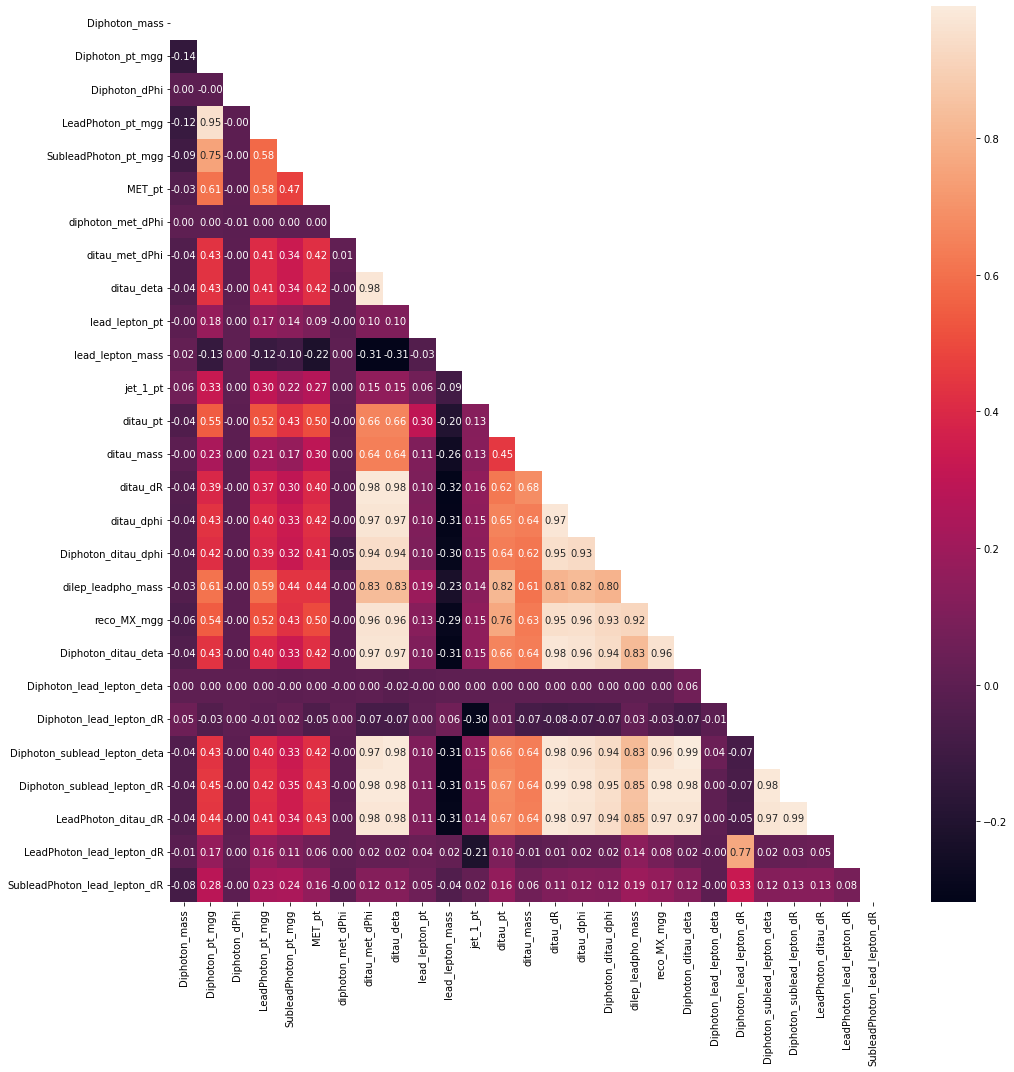

In [11]:
correlation_matrix = data_1000.corr(method = 'pearson')
# Get Diagonal Mask. Square matrix is not relevant.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(correlation_matrix,
                       mask=mask,
                       annot=True,
                       fmt='.2f',
                       square=False)
f.set_tight_layout(True)
f.savefig("data_signal_1000.pdf")
f.savefig("data_signal_1000.png")

In [12]:
from minepy import MINE
 
def compute_MIC(v1: pd.Series, v2: pd.Series) -> float:
    mine = MINE(alpha=0.6, c=15, est='mic_approx')
    mine.compute_score(v1,v2)
    return round(mine.mic(),2)

In [13]:
correlation_matrix = data_1000.corr(method = compute_MIC)
# Get Diagonal Mask. Square matrix is not relevant.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(correlation_matrix,
                       mask=mask,
                       annot=True,
                       fmt='.2f',
                       square=False)
f.set_tight_layout(True)
f.savefig("data_signal_1000_mic.pdf")
f.savefig("data_signal_1000_mic.png")